In [1]:
from __future__ import print_function, division

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [3]:
def get_data(week_nums):
    url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

week_nums = [170506, 170513, 170520, 170527, 170603]
turnstiles_df = get_data(week_nums)

In [4]:
#reset the index
turnstiles_df=turnstiles_df.reset_index()

In [8]:
#last column EXITS has whitespace at the end, strip the whitespace from all columns
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [10]:
turnstiles_df.DESC.value_counts()

REGULAR       988398
RECOVR AUD      4433
Name: DESC, dtype: int64

In [11]:
#drop all rows with 'RECOVR AUD' in 'DESC'
turnstiles_df = turnstiles_df.drop(turnstiles_df[turnstiles_df.DESC == 'RECOVR AUD'].index)

In [12]:
turnstiles_df[["PREV_DATE", "PREV_ENTRIES", "PREV_EXITS"]] = (turnstiles_df
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION", "LINENAME"])
                                                       ["DATE", "ENTRIES", "EXITS"]
                                                       .shift())

In [13]:
turnstiles_df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,00:00:00,REGULAR,6108321,2069313,NaN,NaN,NaN
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319,03/25/2017,6108321.0,2069313.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347,03/25/2017,6108343.0,2069319.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456,03/25/2017,6108360.0,2069347.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525,03/25/2017,6108462.0,2069456.0


In [16]:
turnstiles_df['ENTRIES_COUNT'] = turnstiles_df['ENTRIES'] - turnstiles_df['PREV_ENTRIES']
turnstiles_df['EXITS_COUNT'] = turnstiles_df['EXITS'] - turnstiles_df['PREV_EXITS']
turnstiles_df['TOTAL_TRAFFIC'] = turnstiles_df['ENTRIES_COUNT'] + turnstiles_df['EXITS_COUNT']

In [17]:
turnstiles_df.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_COUNT,EXITS_COUNT,TOTAL_TRAFFIC
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,00:00:00,REGULAR,6108321,2069313,NaN,NaN,NaN,NaN,NaN,NaN
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319,03/25/2017,6108321.0,2069313.0,22.0,6.0,28.0
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347,03/25/2017,6108343.0,2069319.0,17.0,28.0,45.0
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456,03/25/2017,6108360.0,2069347.0,102.0,109.0,211.0
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525,03/25/2017,6108462.0,2069456.0,227.0,69.0,296.0


In [19]:
#drop NaN rows
turnstiles_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [21]:
turnstiles_df[turnstiles_df["ENTRIES_COUNT"] < 0].head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_COUNT,EXITS_COUNT,TOTAL_TRAFFIC
1429,1429,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/25/2017,04:00:00,REGULAR,887125181,492796077,03/25/2017,887125400.0,492796124.0,-219.0,-47.0,-266.0
1430,1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/25/2017,08:00:00,REGULAR,887125119,492795865,03/25/2017,887125181.0,492796077.0,-62.0,-212.0,-274.0
1431,1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/25/2017,12:00:00,REGULAR,887124814,492795172,03/25/2017,887125119.0,492795865.0,-305.0,-693.0,-998.0
1432,1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/25/2017,16:00:00,REGULAR,887124348,492794301,03/25/2017,887124814.0,492795172.0,-466.0,-871.0,-1337.0
1433,1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,03/25/2017,20:00:00,REGULAR,887123728,492793584,03/25/2017,887124348.0,492794301.0,-620.0,-717.0,-1337.0


In [22]:
(turnstiles_df[turnstiles_df["ENTRIES_COUNT"] < 0]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         212
A025   R023  01-03-01  34 ST-HERALD SQ    211
             01-03-02  34 ST-HERALD SQ    210
A035   R170  00-00-01  14 ST-UNION SQ       6
A043   R462  00-06-00  CANAL ST             1
A049   R088  02-05-00  CORTLANDT ST        53
A066   R118  00-00-00  CANAL ST           209
B009   R411  00-00-00  PARK PLACE           1
             00-00-01  PARK PLACE           1
B028   R136  01-00-01  SHEEPSHEAD BAY       1
             01-00-02  SHEEPSHEAD BAY       1
B029   R172  00-00-01  BRIGHTON BEACH       1
C012   R258  01-06-00  4AV-9 ST             1
C019   R232  00-00-02  45 ST               10
C021   R212  00-00-02  59 ST               50
D005   R398  00-00-00  NEW UTRECHT AV       3
             00-00-01  NEW UTRECHT AV       2
             00-00-02  NEW UTRECHT AV       1
             00-06-00  NEW UTRECHT AV       1
             00-06-01  NEW UTRECHT AV       1
H003   R163  01-00-02  6 AV              

In [23]:
turnstiles_df = turnstiles_df[turnstiles_df.ENTRIES_COUNT >= 0]

In [33]:
station_57 = turnstiles_df[turnstiles_df["STATION"] == "57 ST"]

In [36]:
station_57.LINENAME.unique()

array(['F'], dtype=object)

In [24]:
(turnstiles_df[turnstiles_df["ENTRIES_COUNT"] < 0]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
     .size())

Series([], dtype: int64)

In [30]:
(turnstiles_df
    .groupby(["STATION", "LINENAME"])
     .size())

STATION          LINENAME    
1 AV             L               2100
103 ST           1               1239
                 6               1248
                 BC               621
103 ST-CORONA    7               1880
104 ST           A                865
                 JZ               664
110 ST           6               1290
111 ST           7               1054
                 A               1452
                 J                840
116 ST           23              1681
                 6               1680
                 BC              1254
116 ST-COLUMBIA  1               1254
121 ST           JZ               862
125 ST           1               1035
                 23              1249
                 456             2834
                 ACBD            3391
135 ST           23              2525
                 BC              2299
137 ST CITY COL  1               2095
138/GRAND CONC   45               631
14 ST            123FLM          2933
                 ACE

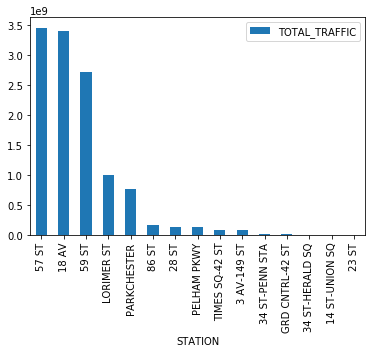

In [26]:
stations = turnstiles_df.groupby(["STATION"]).agg({'TOTAL_TRAFFIC': 'sum'})
top_15 = stations.sort_values('TOTAL_TRAFFIC', ascending = False).head(15)
top_15.plot.bar();

In [41]:
datetime_df = turnstiles_df[['STATION', 'DATE', 'TIME', 'ENTRIES_COUNT', 'EXITS_COUNT', 'TOTAL_TRAFFIC']].copy()
datetime_df["DATE_TIME"] = pd.to_datetime(datetime_df.DATE + " " +datetime_df.TIME, format="%m/%d/%Y %H:%M:%S")
datetime_df['day_of_week'] = datetime_df['DATE_TIME'].dt.weekday_name
station_57_st = datetime_df[datetime_df['STATION'] == '57 ST']
station_57_dow = station_57_st.groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
station_57_dow

,TOTAL_TRAFFIC
day_of_week,
Friday,1.333940e+05
Monday,1.267970e+05
Saturday,9.031400e+04
Sunday,7.920900e+04
Thursday,1.384060e+05
Tuesday,1.360000e+05
Wednesday,3.457700e+09


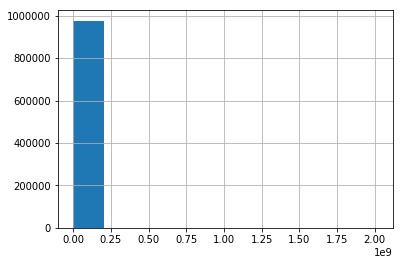

In [45]:
datetime_df.ENTRIES_COUNT.hist();

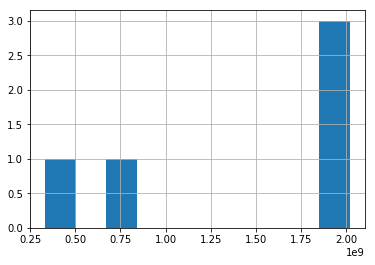

In [46]:
datetime_df[datetime_df.ENTRIES_COUNT > 250000000].ENTRIES_COUNT.hist()

In [47]:
crazy = datetime_df[datetime_df.ENTRIES_COUNT > 250000000]

In [48]:
crazy

,STATION,DATE,TIME,ENTRIES_COUNT,EXITS_COUNT,TOTAL_TRAFFIC,DATE_TIME,day_of_week
36040,LORIMER ST,03/26/2017,13:00:00,8.355588e+08,1.671176e+08,1.002676e+09,2017-03-26 13:00:00,Sunday
424176,18 AV,04/13/2017,09:00:00,1.938529e+09,1.347480e+09,3.286010e+09,2017-04-13 09:00:00,Thursday
504550,57 ST,04/12/2017,13:00:00,1.920096e+09,1.537466e+09,3.457562e+09,2017-04-12 13:00:00,Wednesday
572514,PARKCHESTER,04/12/2017,13:00:00,3.342228e+08,4.345155e+08,7.687383e+08,2017-04-12 13:00:00,Wednesday
619656,59 ST,04/21/2017,08:00:00,2.020572e+09,6.955537e+08,2.716126e+09,2017-04-21 08:00:00,Friday


In [49]:
crazyy = turnstiles_df[turnstiles_df.ENTRIES_COUNT > 250000000]

In [50]:
crazyy

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,ENTRIES_COUNT,EXITS_COUNT,TOTAL_TRAFFIC
36040,36040,J005,R353,00-06-00,LORIMER ST,JM,BMT,03/26/2017,13:00:00,REGULAR,838881750,167779612,03/26/2017,3322999.0,662005.0,8.355588e+08,1.671176e+08,1.002676e+09
424176,28163,D008,R392,00-00-02,18 AV,N,BMT,04/13/2017,09:00:00,REGULAR,1946190907,1358953142,04/13/2017,7661697.0,11472850.0,1.938529e+09,1.347480e+09,3.286010e+09
504550,108537,N600,R302,00-06-00,57 ST,F,IND,04/12/2017,13:00:00,REGULAR,1929351363,1543550333,04/12/2017,9255535.0,6083895.0,1.920096e+09,1.537466e+09,3.457562e+09
572514,176501,R417,R222,00-00-04,PARKCHESTER,6,IRT,04/12/2017,13:00:00,REGULAR,335579664,436263585,04/06/2017,1356852.0,1748127.0,3.342228e+08,4.345155e+08,7.687383e+08
619656,22446,C021,R212,00-00-02,59 ST,NRW,BMT,04/21/2017,08:00:00,REGULAR,2031090592,703462817,04/20/2017,10518173.0,7909114.0,2.020572e+09,6.955537e+08,2.716126e+09


In [72]:
new_df = datetime_df[datetime_df.ENTRIES_COUNT < 3000]

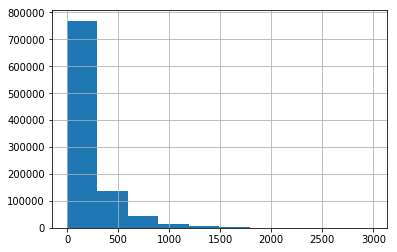

In [73]:
new_df.ENTRIES_COUNT.hist();

In [94]:
new_new_df = new_df.groupby(["STATION"], as_index = False).agg({'TOTAL_TRAFFIC': 'sum'})
top_10 = new_new_df.sort_values('TOTAL_TRAFFIC', ascending = False).head(50)
#top_10.plot.bar()
top_10['STATION']

61      34 ST-PENN STA
233    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
14      14 ST-UNION SQ
46               23 ST
350     TIMES SQ-42 ST
68     42 ST-PORT AUTH
226          FULTON ST
110              86 ST
86      59 ST COLUMBUS
9               125 ST
173           CANAL ST
85               59 ST
115              96 ST
72      47-50 STS ROCK
13               14 ST
217      FLUSHING-MAIN
180        CHAMBERS ST
313       PATH NEW WTC
52               28 ST
257    JKSN HT-ROOSVLT
78               50 ST
360     W 4 ST-WASH SQ
97               72 ST
125     ATL AV-BARCLAY
67     42 ST-BRYANT PK
363            WALL ST
269    LEXINGTON AV/53
95                7 AV
15              145 ST
254    JAY ST-METROTEC
149         BEDFORD AV
104               8 AV
252     JAMAICA CENTER
183          CHURCH AV
102              77 ST
156       BOROUGH HALL
1               103 ST
196    CROWN HTS-UTICA
230           GRAND ST
258     JOURNAL SQUARE
260        KEW GARDENS
6               116 ST
73         

In [76]:
new_df.head()

,STATION,DATE,TIME,ENTRIES_COUNT,EXITS_COUNT,TOTAL_TRAFFIC,DATE_TIME,day_of_week
1,59 ST,03/25/2017,04:00:00,22.0,6.0,28.0,2017-03-25 04:00:00,Saturday
2,59 ST,03/25/2017,08:00:00,17.0,28.0,45.0,2017-03-25 08:00:00,Saturday
3,59 ST,03/25/2017,12:00:00,102.0,109.0,211.0,2017-03-25 12:00:00,Saturday
4,59 ST,03/25/2017,16:00:00,227.0,69.0,296.0,2017-03-25 16:00:00,Saturday
5,59 ST,03/25/2017,20:00:00,294.0,45.0,339.0,2017-03-25 20:00:00,Saturday


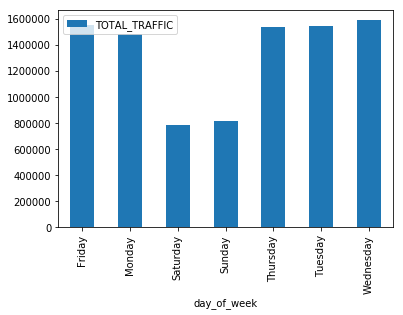

In [79]:
station_34_dow = new_df[new_df['STATION'] == '34 ST-PENN STA'].groupby(["day_of_week"]).agg({'TOTAL_TRAFFIC': 'sum'})
station_34_dow.plot.bar();